In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [272]:
pd.set_option('display.max_columns',35)

In [273]:
df = pd.read_csv(r"C:\Users\shubham\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [274]:
# cat_feature = df.select_dtypes(include="object").columns
# num_feature = df.select_dtypes(exclude="object").columns
# len(cat_feature), len(num_feature)

In [275]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [277]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [278]:
df.shape

(1470, 35)

In [279]:
# Check the Number of Null Values the the coloms
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [280]:
# Check the number of duplicate
df.duplicated().sum()

0

In [281]:
attrition = df["Attrition"].value_counts(normalize=True)

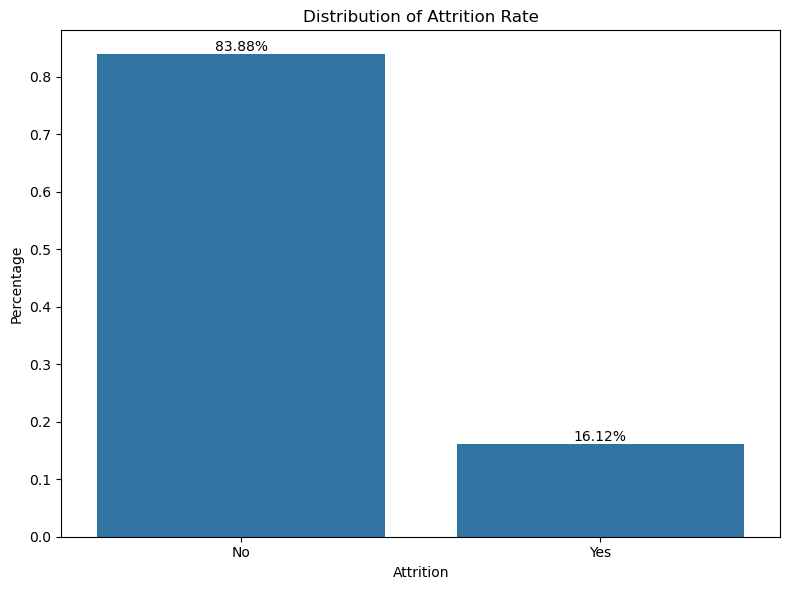

In [282]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition.index, y=attrition)
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%',
    (p.get_x() + p.get_width() / 2.,
    p.get_height()),
    ha='center', va='bottom')
plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

In [283]:
avg_tenure = df["YearsAtCompany"].mean()
avg_tenure

7.0081632653061225

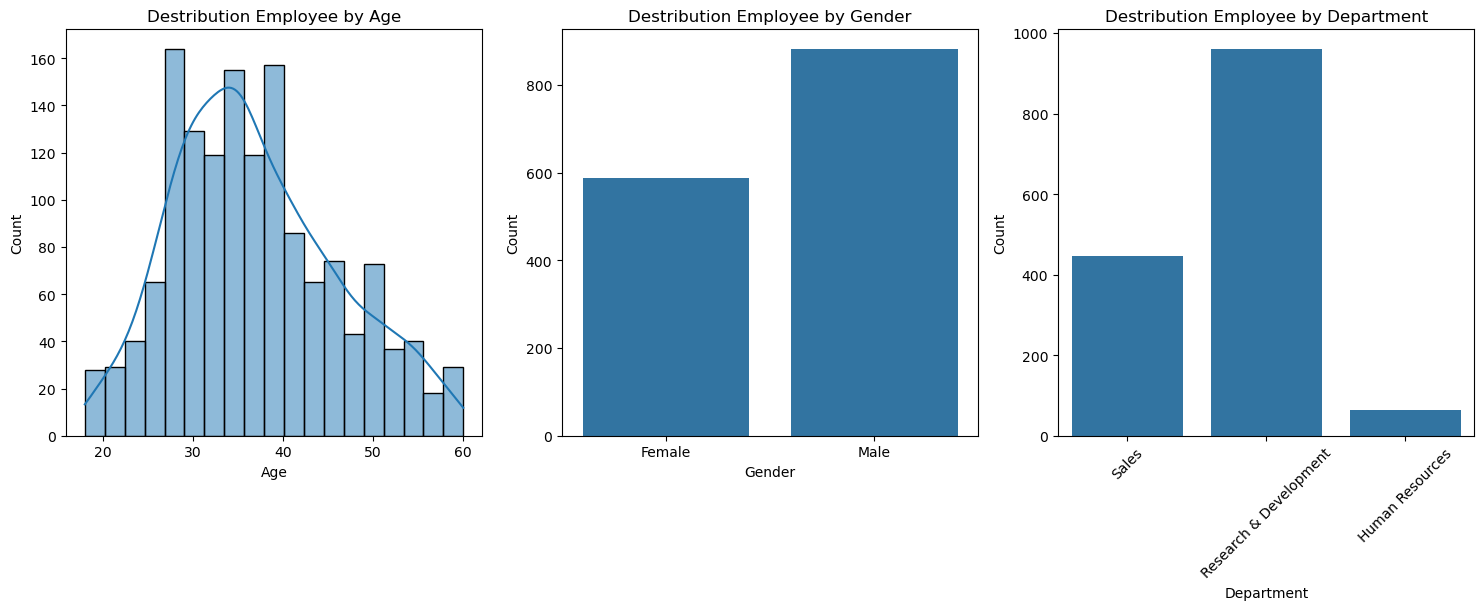

In [284]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
sns.histplot(data=df, x='Age',kde=True, ax=axes[0])
axes[0].set_title("Destribution Employee by Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title("Destribution Employee by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title("Destribution Employee by Department")
axes[2].set_xlabel("Department")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()




In [285]:
df_attrition = df[df['Attrition']=='Yes']
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [286]:
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column,
    'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] /attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df


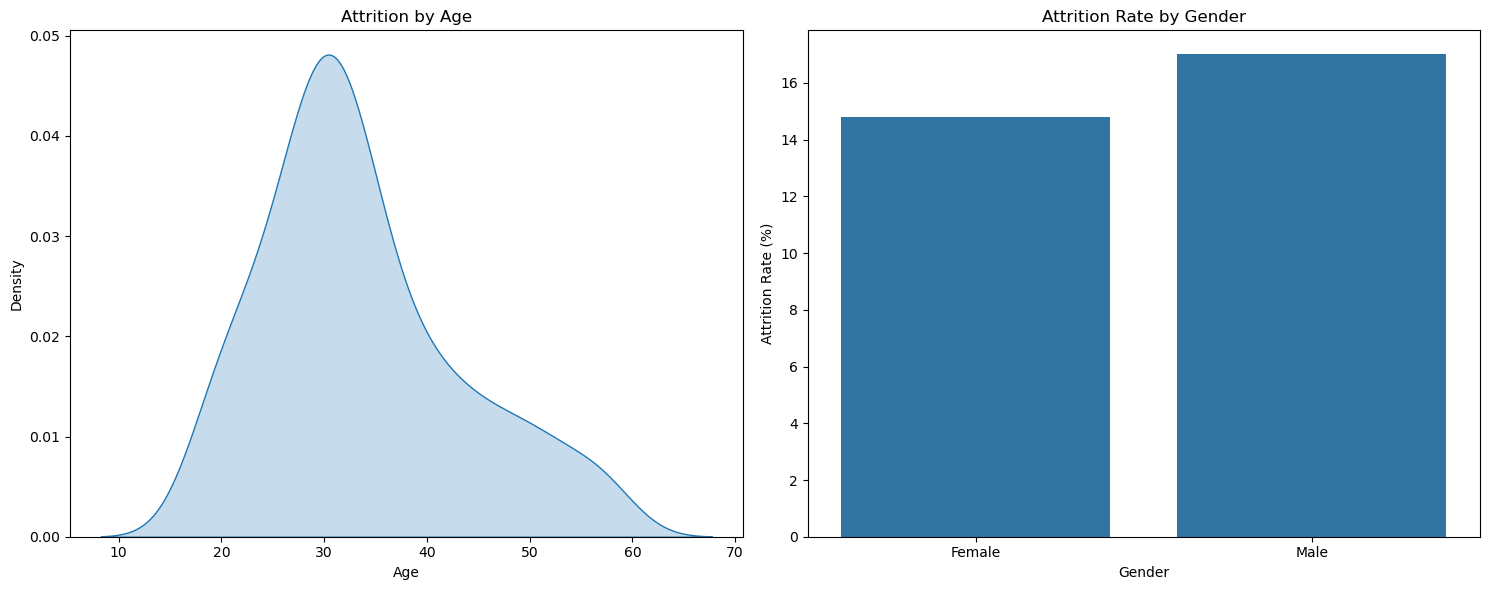

In [287]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.kdeplot(data=df_attrition, x="Age", fill=True, ax=axes[0])
axes[0].set_title("Attrition by Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")

attrribution_rate_df = calculate_attrition_rate(df,"Gender")
sns.barplot(data=attrribution_rate_df, x="Gender",y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

In [288]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [289]:
df['Attrition_Flag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check correlations with numeric features
correlation = df.corr(numeric_only=True)['Attrition_Flag'].sort_values(ascending=False)
print(correlation.head(10))

Attrition_Flag             1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
PerformanceRating          0.002889
HourlyRate                -0.006846
EmployeeNumber            -0.010577
PercentSalaryHike         -0.013478
Education                 -0.031373
YearsSinceLastPromotion   -0.033019
Name: Attrition_Flag, dtype: float64


In [290]:
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop(['Attrition', 'Attrition_Flag'], axis=1, errors='ignore')
y = df_encoded['Attrition_Flag']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [293]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [294]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [295]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    print(f"----- {name} -----")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}\n")

----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

ROC-AUC: 0.7721

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

ROC-AUC: 0.7697

----- Decision Tree -----
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       255
           1       0.20      0.23      0.21        39

    accuracy                           0.77       294
   macro a

In [296]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}



In [297]:
# Reinitialize models
models_for_tuning = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [298]:
# Run GridSearchCV
tuned_reports = {}

for name, model in models_for_tuning.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    print("======",name, grid.best_params_,)
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    tuned_reports[name] = {
        "best_params": grid.best_params_,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

new_df = pd.DataFrame(tuned_reports)

Tuning Logistic Regression...
====== Logistic Regression {'C': 0.1, 'solver': 'lbfgs'}
Tuning Random Forest...
====== Random Forest {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuning Decision Tree...
====== Decision Tree {'max_depth': 5, 'min_samples_split': 10}
Tuning KNN...
====== KNN {'n_neighbors': 7, 'weights': 'distance'}
Tuning SVM...
====== SVM {'C': 0.1, 'kernel': 'linear'}
Tuning XGBoost...
====== XGBoost {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [299]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1,solver='lbfgs'),
    "Random Forest": RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200),
    "Decision Tree": DecisionTreeClassifier(max_depth =  5, min_samples_split= 10),
    "KNN": KNeighborsClassifier(n_neighbors= 7, weights= 'distance'),
    "SVM": SVC(probability=True, C= 0.1, kernel =  'linear'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)
}

In [300]:
final_score = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    final_score.append({
        'name':model,
        'test_score':model.score(X_test_scaled, y_test)*100,
        'train_score': model.score(X_train_scaled, y_train)*100
    })
    # print(classification_report(y_test, y_pred))
new_df = pd.DataFrame(final_score).sort_values(by="test_score", ascending=False)
new_df.head()

,name,test_score,train_score
0,LogisticRegression(C=0.1),89.455782,86.904762
4,"SVC(C=0.1, kernel='linear', probability=True)",88.775510,87.159864
5,"XGBClassifier(base_score=None, booster=None, c...",88.435374,94.897959
3,"KNeighborsClassifier(n_neighbors=7, weights='d...",88.095238,100.000000
1,"(DecisionTreeClassifier(max_features='sqrt', r...",87.755102,100.000000


In [301]:
best_model = new_df.loc[new_df['test_score'].idxmax()]
bestmodel = best_model["name"]
bestmodel

LogisticRegression(C=0.1)

In [302]:
pickle.dump(bestmodel,open("logisticreg.pkl",'wb'))

In [303]:
mod = pickle.load(open("logisticreg.pkl", "rb"))

In [304]:
# mod.predict()